In [31]:
#importing required Libraries
import numpy as np
import tensorflow
import keras
import os
import glob
from skimage import io ,color
import skimage
import random
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Step 1: Load Dataset

Number of images in class Apple: 294
Number of images in class Avocado: 468
Number of images in class Banana: 169
Number of images in class Blackberrie: 300
Number of images in class Pear: 326


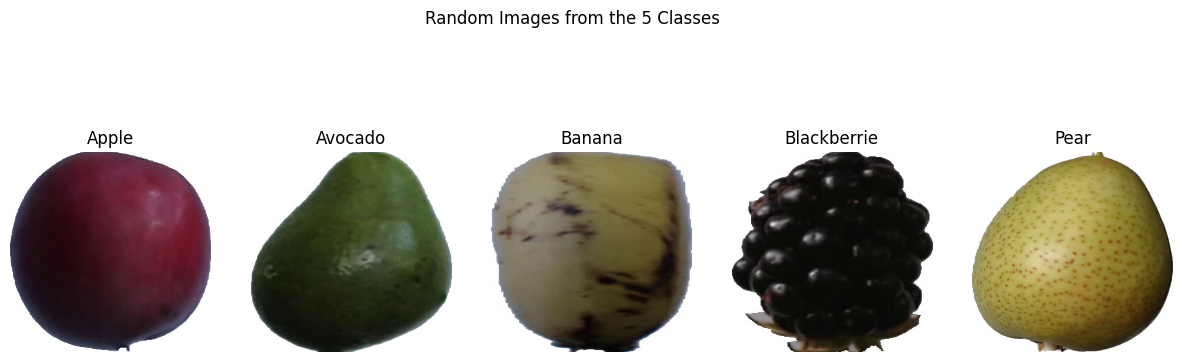

In [9]:
# Define the root directory where images are stored
from skimage.transform import resize
root = r'D:\projects\Project Ai KenKen\ML-Project-2025\notebooks\DataSetForImages\Training'

classes = ['Apple', 'Avocado', 'Banana', 'Blackberrie', 'Pear']

target_size = (200, 200)

images = {}

for cls in classes:
    images[cls] = []
    classpath = os.path.join(root, cls)
    for img_path in glob.glob(os.path.join(classpath, '*.jpg')):
        img = io.imread(img_path)
        img = resize(img, target_size)
        images[cls].append(img) 

for cls in classes:
    print(f"Number of images in class {cls}: {len(images[cls])}")

# Displaying some random images from the dataset

fig, axes = plt.subplots(1, 5, figsize=(15,5))  

for ax, cls in zip(axes, classes):
    img = images[cls][0] 
    ax.imshow(img)
    ax.set_title(cls)
    ax.axis('off')

fig.suptitle('Random Images from the 5 Classes')
plt.show()



## Step 2 Visualizing the Original Image and Its RGB Color Channels

TypeError: slicing must be with an int or slice object

Error in callback <function _draw_all_if_interactive at 0x0000022F012789A0> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

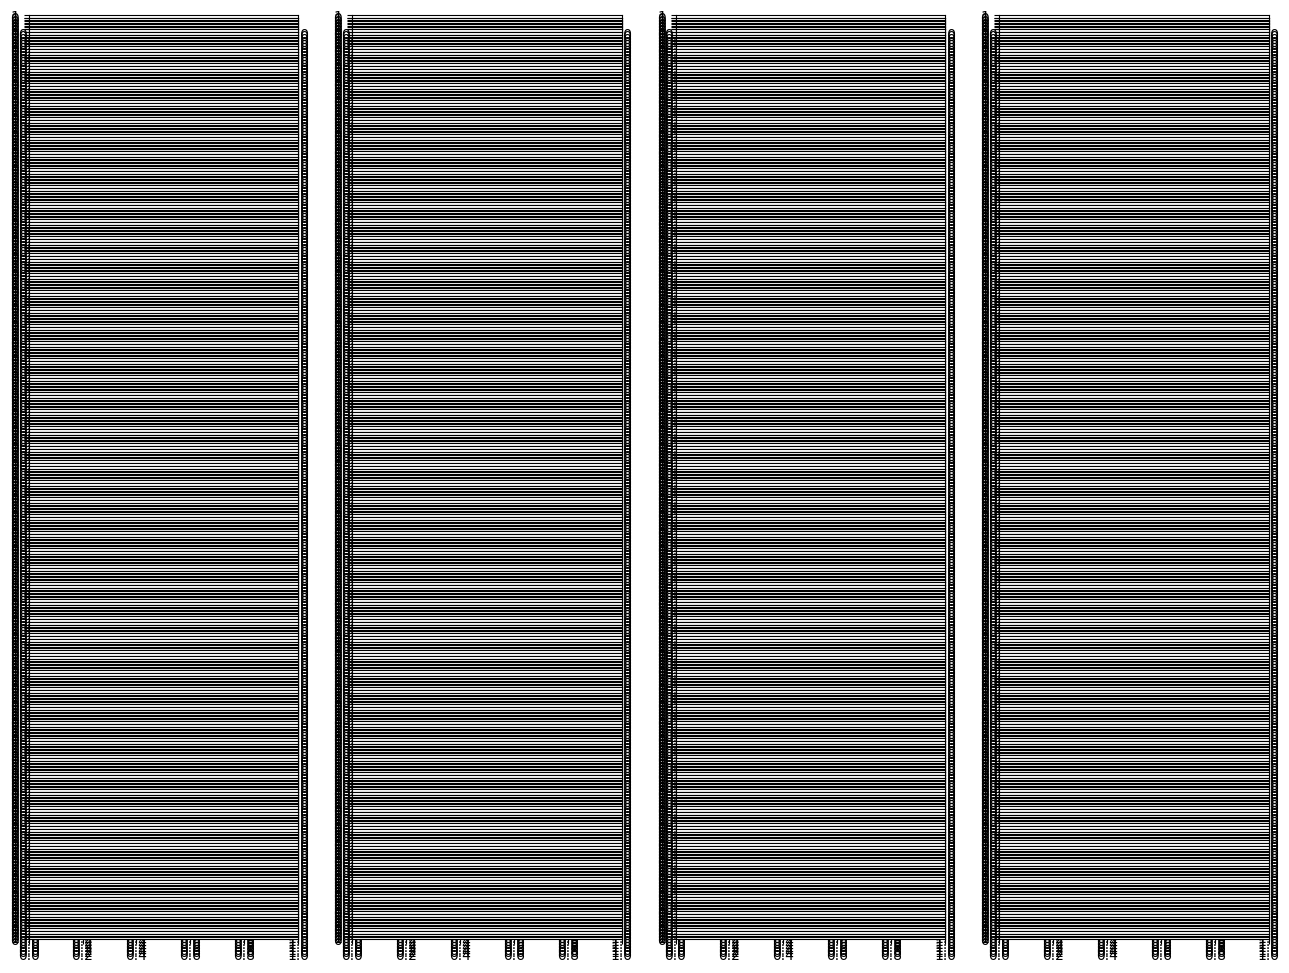

In [19]:
fig, axes = plt.subplots(len(images), 4, figsize=(16, 12), sharey=False)

images_list = [images[cls][0] for cls in classes]

for row, (img, label) in enumerate(zip(images_list, classes)):
    print(img.shape)
    # Original image
    axes[row, 0].imshow(img)
    axes[row, 0].set_title(f'{label} Original')
    axes[row, 0].axis('off')
    
    # Red channel
    axes[row, 1].imshow(img[:, :, 0], cmap='Reds')
    axes[row, 1].set_title('Red channel')
    axes[row, 1].axis('off')
    
    # Green channel
    axes[row, 2].imshow(img[:, :, 1], cmap='Greens')
    axes[row, 2].set_title('Green channel')
    axes[row, 2].axis('off')
    
    # Blue channel
    axes[row, 3].imshow(img[:, :, 2], cmap='Blues')
    axes[row, 3].set_title('Blue channel')
    axes[row, 3].axis('off')

fig.suptitle('Original & RGB Channels for Each Class', fontsize=16)
plt.tight_layout()
plt.show()

##  Converting RGB Image to Grayscale

Total images in Graydataset: 1557


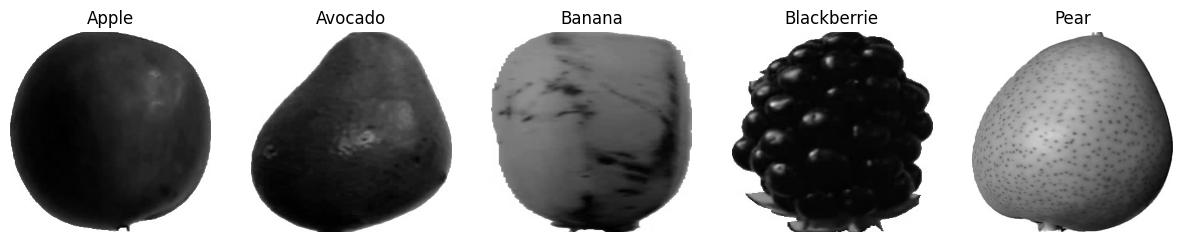

In [33]:
classes = ['Apple', 'Avocado', 'Banana', 'Blackberrie', 'Pear']

Graydataset = []

for cls in classes:
    for img in images.get(cls, []):
        gray_img = cv2.cvtColor((img*255).astype(np.uint8), cv2.COLOR_RGB2GRAY)
        Graydataset.append((gray_img, cls))

print(f'Total images in Graydataset: {len(Graydataset)}')
# عرض بعض الصور الرمادية من كل فئة
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for ax, cls in zip(axes, classes):
    # العثور على أول صورة من الفئة
    for img, label in Graydataset:
        if label == cls:
            ax.imshow(img, cmap='gray')
            ax.set_title(cls)
            ax.axis('off')
            break

##  Histogram Equalization for Contrast Enhancement 


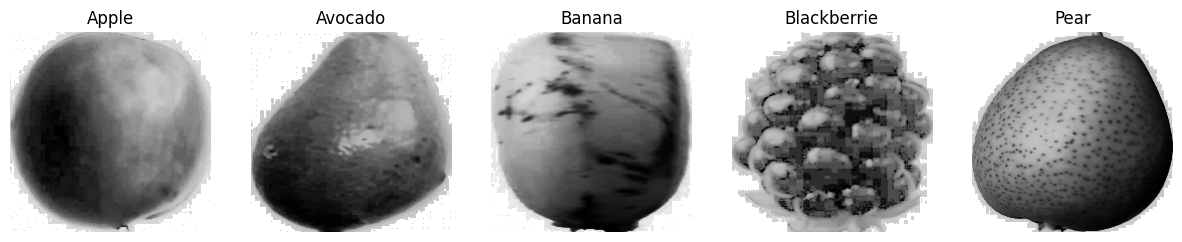

In [35]:
# Histogram Equalization for Contrast Enhancement 
equalized_imgs = [] 
for (img, cls) in Graydataset:
    equalized_img = cv2.equalizeHist(img)
    equalized_imgs.append((equalized_img, cls))


fig, axes = plt.subplots(1, 5, figsize=(15, 5))

for ax, cls in zip(axes, classes):
    for img, label in equalized_imgs:
        if label == cls:
            ax.imshow(img, cmap='gray')
            ax.set_title(cls)
            ax.axis('off')
            break

## Normalization (Min–Max Scaling)


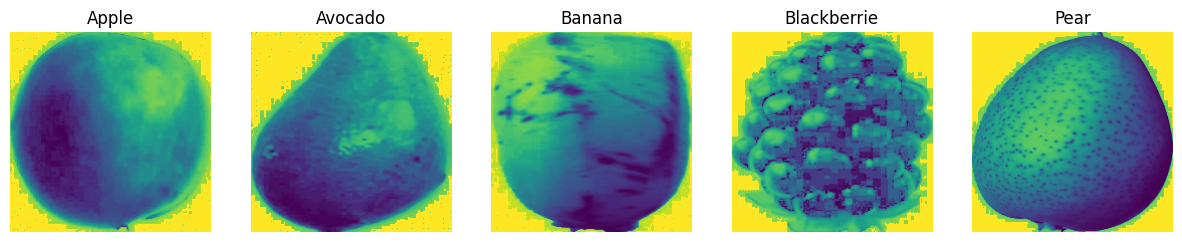

In [36]:
Normalizeddataset = []
for gray_img, cls in equalized_imgs:
    norm_img = (gray_img - np.min(gray_img)) / (np.max(gray_img) - np.min(gray_img))
    Normalizeddataset.append((norm_img, cls))

fig, axes = plt.subplots(1, 5, figsize=(15, 5))

for ax, cls in zip(axes, classes):
    # العثور على أول صورة من الفئة
    for img, label in Normalizeddataset:
        if label == cls:
            ax.set_title(cls)
            ax.imshow(img)
            ax.axis('off')
            break

##  Preparing Image Batch for Data Augmentation


In [41]:
from numpy import expand_dims
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from sklearn.preprocessing import LabelEncoder

x = np.array([img for img, cls in Normalizeddataset])
y = np.array([cls for img, cls in Normalizeddataset])
le =  LabelEncoder()
y = le.fit_transform(samples_labels)


generator = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True
)


train_gen = generator.flow(
    x.reshape(-1, 200, 200, 1),
    y,
    batch_size=16
)

images_batch, labels_batch = next(train_gen)
print(images_batch.shape)  # (16, H, W, 1)
print(len(images_batch))  #16
print(labels_batch.shape)  # (16, num_classes)

(16, 200, 200, 1)
16
(16,)


## Logistic Regression

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# X و y جاهزين من preprocessing
# X.shape = (N, H, W, 1) 
# y.shape = (N,)

# Flatten images لكل sample
N, H, W,  = x.shape
X_flat = x.reshape(N, H*W)  # كل صورة تصبح vector بطول H*W

# Split to train & test
X_train, X_test, y_train, y_test = train_test_split(X_flat, y, test_size=0.2, random_state=42)

logreg = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs')
logreg.fit(X_train, y_train)

# Evaluate
y_pred = logreg.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy:", acc)


c:\Users\Yuossef ezzat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Logistic Regression Accuracy: 1.0


## KMeans Clustering (Unsupervised)

In [50]:
from sklearn.cluster import KMeans

num_clusters = len(np.unique(y))  # عدد الكلاسات
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X_flat)

cluster_labels = kmeans.labels_

# توزيع الصور على clusters
for i in range(num_clusters):
    print(f"Cluster {i} has {np.sum(cluster_labels == i)} images")



Cluster 0 has 872 images
Cluster 1 has 390 images
Cluster 2 has 156 images
Cluster 3 has 72 images
Cluster 4 has 67 images


In [53]:
from sklearn.metrics import accuracy_score
from scipy.optimize import linear_sum_assignment

import numpy as np

# y_encoded = labels الأصلية بعد LabelEncoder
# cluster_labels = نتائج KMeans

# 1- حساب confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, cluster_labels)

# 2- إيجاد أفضل توافق بين clusters و labels
# باستخدام Hungarian algorithm
row_ind, col_ind = linear_sum_assignment(-cm)  # سالب لأن linear_sum_assignment تبحث عن أقل قيمة
mapping = dict(zip(col_ind, row_ind))

# 3- تحويل cluster labels للأرقام المقابلة للـ true labels
new_labels = np.array([mapping[label] for label in cluster_labels])

# 4- حساب accuracy
acc = accuracy_score(y, new_labels)
print("KMeans Accuracy:", acc)


KMeans Accuracy: 0.5330764290301863
